In [129]:
!dir

 驱动器 C 中的卷是 Windows
 卷的序列号是 F4DF-D255

 C:\Users\sujiaqi 的目录

2019/10/30  20:47    <DIR>          .
2019/10/30  20:47    <DIR>          ..
2019/04/08  20:15    <DIR>          .anaconda
2019/02/25  15:20    <DIR>          .android
2019/09/27  17:49            22,289 .bash_history
2019/04/01  19:04    <DIR>          .ches-mapper
2019/04/09  00:41    <DIR>          .conda
2019/08/27  19:43               303 .condarc
2019/04/23  16:02    <DIR>          .config
2019/02/26  16:35               533 .csds_defaults3
2019/08/26  17:02    <DIR>          .docker
2019/04/12  18:09               206 .gitconfig
2019/04/01  21:45    <DIR>          .idlerc
2019/03/06  15:54    <DIR>          .inteligand-data
2019/03/06  15:55    <DIR>          .inteligand_license
2019/10/30  11:12    <DIR>          .ipynb_checkpoints
2019/04/08  20:15    <DIR>          .ipython
2019/04/10  10:55    <DIR>          .jchempaint
2019/04/16  09:42    <DIR>          .jmol
2019/03/27  22:44    <DIR>          .jnati
2019/10/27

## `arcgis.mapping` 

In [130]:
import arcgis
from arcgis.gis import GIS
#gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")
gis=GIS()

In [126]:
# 创造一张地图
map1 = gis.map('Beijing')

In [131]:
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=9.0)

## 设置地图属性
### 放大以及缩小

## 2D视图中的放大以及缩小

In [132]:
map1.zoom = 15

2D视图中可以设置旋转

In [135]:
map1.rotation = 90


使用地理编码去获得位置的的坐标来驱动这个部件，地理编码将位置的名字转化为坐标
通过arcgis.geocoding.geocode()来使用

`Palace Museum, BJ` 

In [ ]:
location = arcgis.geocoding.geocode('Palace Museum, BJ', max_locations=1)[0]
map1.extent = location['extent']

In [8]:
location

{'address': 'Palace Museum',
 'location': {'x': 116.39078000000006, 'y': 39.916720000000055},
 'score': 91.43,
 'attributes': {'Loc_name': 'World',
  'Status': 'T',
  'Score': 91.43,
  'Match_addr': 'Palace Museum',
  'LongLabel': 'Palace Museum, Beijing, CHN',
  'ShortLabel': 'Palace Museum',
  'Addr_type': 'POI',
  'Type': 'Historical Monument',
  'PlaceName': 'Palace Museum',
  'Place_addr': 'Beijing',
  'Phone': '',
  'URL': '',
  'Rank': 2.5,
  'AddBldg': '',
  'AddNum': '',
  'AddNumFrom': '',
  'AddNumTo': '',
  'AddRange': '',
  'Side': '',
  'StPreDir': '',
  'StPreType': '',
  'StName': '',
  'StType': '',
  'StDir': '',
  'BldgType': '',
  'BldgName': '',
  'LevelType': '',
  'LevelName': '',
  'UnitType': '',
  'UnitName': '',
  'SubAddr': '',
  'StAddr': '',
  'Block': '',
  'Sector': '',
  'Nbrhd': '',
  'District': '',
  'City': '',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Beijing',
  'RegionAbbr': 'Beijing',
  'Territory': '',
  'Zone': '',
  'Postal': '',
  '

## Basemaps

basemaps有不同的地图，帮助理解特征


In [12]:
map1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [11]:
len(map1.basemaps)

17

In [124]:
map1.basemap = 'dark-gray-vector'
map1

MapView(heading=353.5476482106268, jupyter_target='notebook', layout=Layout(height='400px', width='100%'), rea…

使用basemap属性查看当前的底图


In [14]:
map1.basemap

'dark-gray-vector'

制作一个动画

In [ ]:
import time
for basemap in map1.basemaps:
    map1.basemap = basemap
    print('This map is :',basemap)
    time.sleep(5)

# 3D Mode

同样支持3D模型

In [17]:
ca_map = gis.map('China', zoomlevel=5, mode="3D") 
ca_map

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=5.0)

`tilt`（斜视）度数从 0-90

`heading`以指定逆时针的北纬度数。

In [ ]:
ca_map.tilt = 45

In [ ]:
ca_map.heading = 45

## 给地图加图层
使用 `add_layer()` 

In [67]:
gis = GIS("https://www.arcgis.com","arcgis_python","P@ssword123")

In [68]:
gis

GIS @ https://geosaurus.maps.arcgis.com version:7.3

In [73]:
search_subset = gis.content.search("WebMap for Landfall Spotlight Article",item_type="Web Map")
print(type(search_subset))
search_subset

<class 'list'>


[<Item title:"WebMap for Landfall Spotlight Article" type:Web Map owner:amani_geosaurus>]

In [74]:
map2=search_subset[0]

### 改变地图的主题

<Item title:"WebMap for Landfall Spotlight Article" type:Web Map owner:amani_geosaurus>
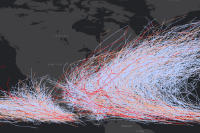

In [75]:
map2

In [78]:
from arcgis.mapping import WebMap
test_webmap = WebMap()
test_webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [79]:
test_map = WebMap(map2)

In [82]:
for i in test_map.layers:
    print(i.title)

Hurricanes that made landfall - categorized
Hurricane track density
Global hurricanes - categorized
Landfall locations
Landfall density


In [ ]:
test_map

### 改变地图的图层
 增加`FeatureLayer`, `FeatureCollection`, `ImageryLayer`, `MapImageLayer` 到地图上.

In [112]:
map2 = gis.map()

In [113]:
map2

MapView(layout=Layout(height='400px', width='100%'))

In [120]:
liberia_item = gis.content.get('49161527a2bc4f4782b50d2c14e38f4a')
map2.add_layer(liberia_item, options={'title':'Liberia facilities and hospitals'})

## 在map中绘制图形
draw()

In [121]:
map2.draw('rectangle')

In [ ]:
map2.draw('circle')

## 清楚绘图标记
使用 `clear_graphics()` 方法

In [119]:
map2.clear_graphics()

## 将地图保存为一个  web map
使用`save()`方法
To save the map, call the `save()` method. 

In [123]:
webmap_item_properties = {'title':'my_test',
                         'snippet':'Map',
                         'tags':['python','test']}

map2.save(webmap_item_properties, thumbnail='webmap_test_1.png',)

<Item title:"my_test" type:Web Map owner:arcgis_python>

You can use this web map back in the notebook, or in any ArcGIS app capabale of rendering web maps. To learn how you can use this read this web map using the Python API, refer to the guide titled [working with web maps and scenes](../working-with-web-maps-and-web-scenes/)